In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
df_cc = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Kaggle_DS/Creditcard-Fraud-Detection/creditcard.csv')

In [5]:
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df_cc['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

<AxesSubplot:>

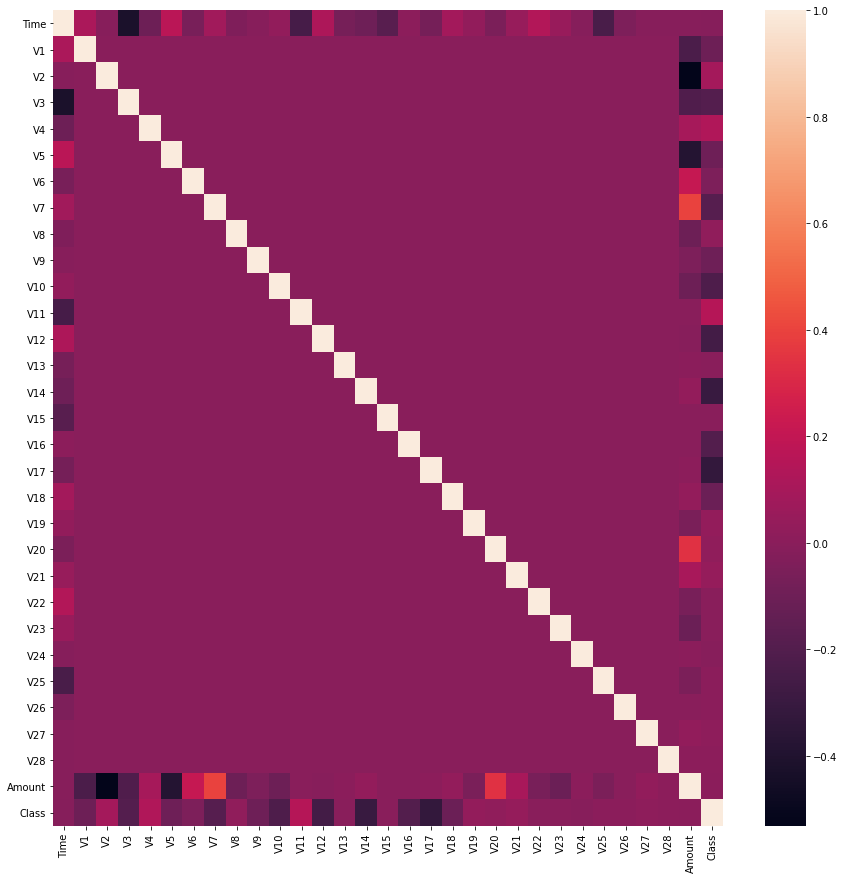

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cc.corr())

In [7]:
X = df_cc.iloc[:, 0:-1]
y = df_cc.iloc[:, -1]

In [8]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

0    284315
1       492
Name: Class, dtype: int64

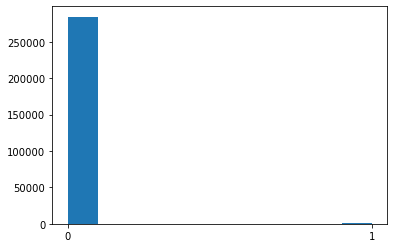

In [9]:
plt.hist(y)
plt.xticks((0,1))
y.value_counts()

## Data imbalance - stratification and Resampling

As per the histogram above for the target variable - the ratio between the 2 classes is around 0.2% - which implies highly imbalanced data.
Below we try to use different stratification and resampling techniques and check the score for each iteration.

Isolation Forest is specifically chosen for finetuning - as the algorithm natively identifies outliers (Anomaly Detection)

####  Train test split with stratification

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify=y)

In [31]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


### Isolation Forest - Model train & score

In [32]:
params = {'n_estimators':[100,150],'contamination':[0.01]}
#score = {'scoring':['accuracy_score','f1_score','roc_auc_score']}
isolation_model = IsolationForest()
isol_rand = RandomizedSearchCV(isolation_model, params, cv=5, scoring=scoring, refit='AUC')

isol_rand.fit(X_train, y_train)

isol_rand.best_params_

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 150, 'contamination': 0.01}

In [33]:
y_pred_is = isol_rand.predict(X_test)

In [34]:
y_pred_acc = accuracy_score(y_test, y_pred_is)
y_pred_acc

0.0006934508396021874

In [134]:
y_pred_cfm = confusion_matrix(y_test, y_pred_is)
print(y_pred_cfm)

y_pred_clf = classification_report(y_test, y_pred_is)
print(y_pred_clf)

[[     0      0      0]
 [  1082      0 112644]
 [   120      0     77]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    113726
           1       0.00      0.39      0.00       197

    accuracy                           0.00    113923
   macro avg       0.00      0.13      0.00    113923
weighted avg       0.00      0.00      0.00    113923



C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\

#### Isolation Forest with Increase in num of estimators

In [35]:
isolation_model_200 = IsolationForest(n_estimators=200, contamination=0.01)

isolation_model_200.fit(X_train, y_train)


IsolationForest(contamination=0.01, n_estimators=200)

In [36]:
y_pred_is_200 = isolation_model_200.predict(X_test)

In [37]:
y_pred_acc_200 = accuracy_score(y_test, y_pred_is_200)
y_pred_acc_200

0.000886563731643303

In [38]:
y_pred_cfm = confusion_matrix(y_test, y_pred_is)
print(y_pred_cfm)

y_pred_clf = classification_report(y_test, y_pred_is)
print(y_pred_clf)

[[     0      0      0]
 [  1060      0 112666]
 [   118      0     79]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    113726
           1       0.00      0.40      0.00       197

    accuracy                           0.00    113923
   macro avg       0.00      0.13      0.00    113923
weighted avg       0.00      0.00      0.00    113923



C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\

In [39]:
y_test.value_counts()

0    113726
1       197
Name: Class, dtype: int64

There is increase in recall from 39% to 40% for increase in  num of estimators


#### XGB Classifier - increase in estimators

In [25]:
from xgboost import XGBClassifier

In [44]:
labels = [0,1]

In [26]:
xgb_model_iter1 = XGBClassifier(n_estimators = 150, learning_rate=0.05 , verbose=2)

xgb_model_iter1.fit(X_train, y_train)

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=2,
              verbosity=None)

In [27]:
y_pred_iter1 = xgb_model_iter1.predict(X_test)

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [28]:
y_pred_acc_xgb_iter1 = accuracy_score(y_test, y_pred_iter1)
y_pred_acc_xgb_iter1

0.9995084399111681

In [29]:
y_pred_cfm_xgb_iter1 = classification_report(y_test, y_pred_iter1)
print(y_pred_cfm_xgb_iter1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.95      0.75      0.84       197

    accuracy                           1.00    113923
   macro avg       0.98      0.88      0.92    113923
weighted avg       1.00      1.00      1.00    113923



Random Forest confusion matrix 
 [[113719      7]
 [    49    148]]
Y test data Class 0 and Classs 1 actual count 
 0    170589
1       295
Name: Class, dtype: int64


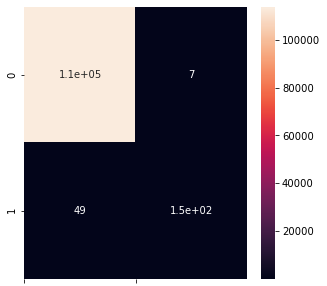

In [40]:
y_pred_xgb_cfm = confusion_matrix(y_test, y_pred_iter1)
plt.figure(figsize=(5,5))
sns.heatmap(y_pred_xgb_cfm, annot = True)
print("Random Forest confusion matrix \n",y_pred_xgb_cfm)
plt.xticks((0,1))
print("Y test data Class 0 and Classs 1 actual count \n",y_train.value_counts())

### Random Forest Classifier - Model predict and score

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf_model_iter1 = RandomForestClassifier(n_estimators = 150, n_jobs=-1 , verbose=2, warm_start=True)

rf_model_iter1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.5s


building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


RandomForestClassifier(n_estimators=150, n_jobs=-1, verbose=2, warm_start=True)

In [10]:
y_pred_rf = rf_model_iter1.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.8s finished


In [11]:
y_pred_acc_rf = accuracy_score(y_test, y_pred_rf)
y_pred_acc_rf

0.9995259956286263

In [12]:
y_pred_rf_clf = classification_report(y_test, y_pred_rf)
print(y_pred_rf_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.96      0.76      0.85       197

    accuracy                           1.00    113923
   macro avg       0.98      0.88      0.92    113923
weighted avg       1.00      1.00      1.00    113923



Random Forest confusion matrix 
 [[113720      6]
 [    48    149]]
Y test data Class 0 and Classs 1 actual count 
 0    170589
1       295
Name: Class, dtype: int64


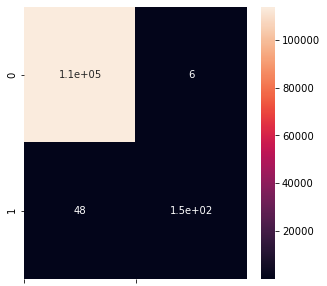

In [24]:
y_pred_rf_cfm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,5))
sns.heatmap(y_pred_rf_cfm, annot = True)
print("Random Forest confusion matrix \n",y_pred_rf_cfm)
plt.xticks((0,1))
print("Y test data Class 0 and Classs 1 actual count \n",y_train.value_counts())

### Model performance based on recall rate
- XG Boost and Random Forest have 75% & 76% recall rate which is significantly higher compared to Isolation Forest model